In [3]:
import pandas as pd
import numpy as np
import os
from tabulate import tabulate
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
pd.set_option('display.max_colwidth', None)
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [4]:
df = pd.read_excel("C:/Users/User/Desktop/CSR/제조서비스팀_23년생산성지표.XLSX", sheet_name='23년_CSR_전체')
print(len(df))
df_real = df[['요청자 소속사','담당업무','제목','완료일','요청자명','접수자명(최초)','처리자명', '처리유형','처리방안','업무유형지수']]
df_real['건수']=1 #건수 계산을 위한 컬럼 생성

4054


C:\Users\User\AppData\Local\Temp\ipykernel_12772\1597773858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['건수']=1 #건수 계산을 위한 컬럼 생성


In [5]:
#티시스인 경우
# 자동 : [Program , Config, 권한, 데이터 작업, 설정요청], 나머지: 수동으로 변경
df_real.loc[((df_real['요청자 소속사']=='TSIS') & df_real['처리유형'].isin(['Program','Config','권한','데이터 작업','설정 요청'])), '처리유형'] = 'B 전산처리의뢰서(미이관)'
df_real.loc[((df_real['요청자 소속사']=='TSIS') & (df_real['처리유형']!='B 전산처리의뢰서(미이관)')), '처리유형'] = 'A 수동등록'


In [6]:
df_real

,요청자 소속사,담당업무,제목,완료일,요청자명,접수자명(최초),처리자명,처리유형,처리방안,업무유형지수,건수
0,태광산업(주),MM,수입 피오 문의,2023-04-18,김희준,성보승,성보승,A 수동등록,업무 의뢰(확인/실행),0.4,1
1,대한화섬(주),PP,자재마스터 변경 처리 지원,2023-04-12,김병희,차은주,차은주,A 수동등록,데이터 작업,0.6,1
2,태광산업(주),공통,ZCSR 삭제방법 문의,2023-04-13,김희준,성보승,성보승,A 수동등록,데이터 요청/추출,0.2,1
3,태광산업(주),PP,재공처리 실적 취소 지원,2023-04-26,최한태,차은주,차은주,A 수동등록,데이터 작업,0.6,1
4,태광산업(주),CO,수출제비용 전표 전기 시 CO 계정지정 오류 원인 문의,2023-04-18,신윤정,김가을,김가을,A 수동등록,업무 의뢰(확인/실행),0.4,1
...,...,...,...,...,...,...,...,...,...,...,...
4049,TSIS,MM,[MM] 실투입전표 상태값 확인 RFC 수정,2023-12-11,강이슬,성보승,성보승,B 전산처리의뢰서(미이관),소스 변경,1.0,1
4050,TSIS,MM,[MM] 코스트센터 유효성 체크 RFC 수정,2023-12-11,강이슬,성보승,성보승,B 전산처리의뢰서(미이관),소스 변경,1.0,1
4051,TSIS,MM,[MM] MIS 상품 자재 등록 및 업체 생성 문의,2023-12-11,정세웅,성보승,성보승,A 수동등록,업무의뢰,0.4,1
4052,TSIS,FI,[문의] SAP 아이디 리스트 문의,2023-12-13,정승연,서단비,서단비,A 수동등록,업무의뢰,0.4,1


In [7]:
# 자동등록인 경우
df_BC =df_real.loc[((df_real['처리자명']!='이주용') & (df_real['처리유형']!='A 수동등록'))] #처리자가 이주용인경우 삭제

Text(5.5, 77.9, '평균점수 : 62.9,     표준편차 : 53.278')

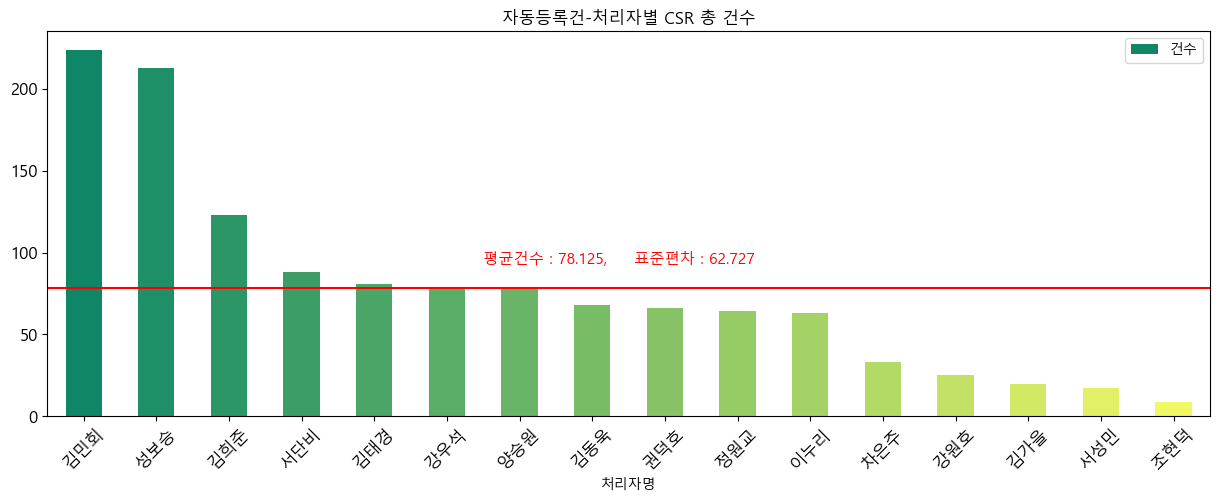

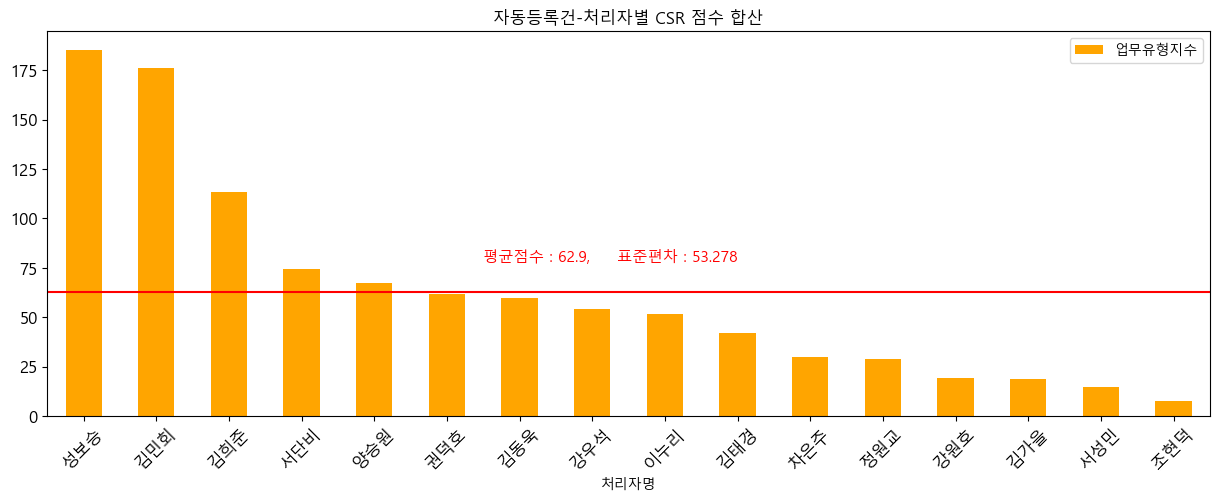

In [8]:
#자동등록건-처리자별 CSR 총 건수
csr_sub_group =df_BC.groupby(['처리자명'], sort=True)[['건수']].sum().reset_index()
csr_sub_group =csr_sub_group.sort_values(by=['건수'],  ascending=False)
colors = sns.color_palette('summer', len(csr_sub_group)) # 바차트 색상
csr_sub_group.plot.bar(x='처리자명', y='건수', figsize=(15,5),fontsize=12,rot=45, title="자동등록건-처리자별 CSR 총 건수",color=colors)
plt.axhline(y=csr_sub_group['건수'].mean(),color='red')
plt.text(5.5,csr_sub_group['건수'].mean()+15,'평균건수 : {},     표준편차 : {}'.format(round(csr_sub_group['건수'].mean(),3),round(csr_sub_group['건수'].std(),3)),fontsize=11, color ='red')


#자동등록건-처리자별 CSR 점수 합산
csr_sub_groupBC =df_BC.groupby(['처리자명'], sort=True)[['업무유형지수']].sum().reset_index()
csr_sub_groupBC =csr_sub_groupBC.sort_values(by=['업무유형지수'],  ascending=False)
csr_sub_groupBC.plot.bar(x='처리자명', y='업무유형지수', figsize=(15,5),fontsize=12,rot=45, title="자동등록건-처리자별 CSR 점수 합산", color='orange')
plt.axhline(y=csr_sub_groupBC['업무유형지수'].mean(),color='red')
plt.text(5.5,csr_sub_groupBC['업무유형지수'].mean()+15,'평균점수 : {},     표준편차 : {}'.format(round(csr_sub_groupBC['업무유형지수'].mean(),3),round(csr_sub_groupBC['업무유형지수'].std(),3)),fontsize=11, color ='red')


Text(5.5, 77.9, '평균점수 : 62.9,     표준편차 : 34.272')

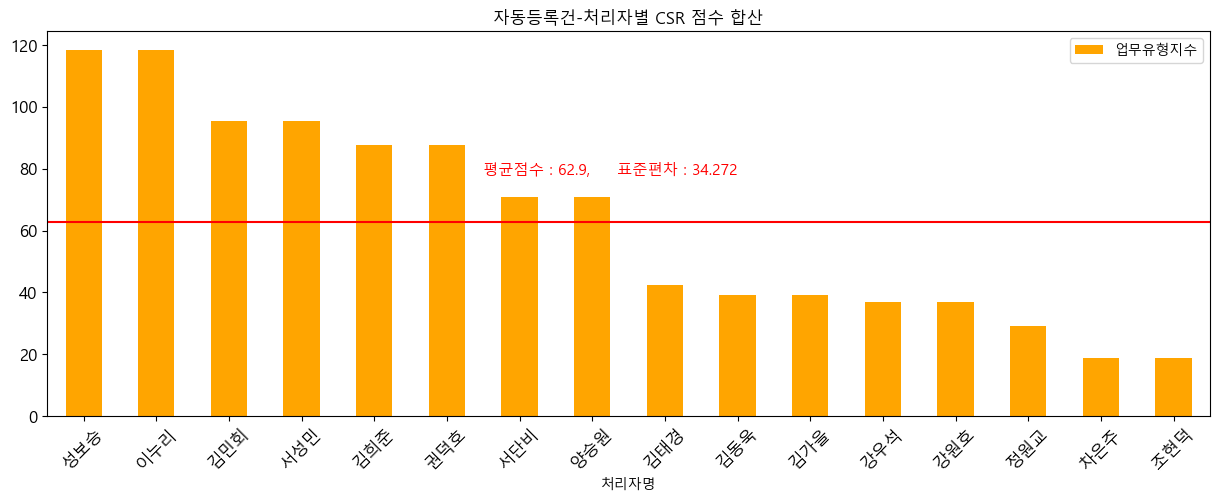

In [9]:
#자동등록건 
# (성보승, 이누리), (김민회, 서성민), (서단비,양승원), (권덕호, 김희준), (강우석, 강원호), (정원교), (조현덕, 차은주), (김가을,김동욱), (김태경)

csr_sub_groupBC.loc[(csr_sub_groupBC['처리자명'].isin(['성보승','이누리'])), '업무유형지수']  =csr_sub_groupBC['업무유형지수'] .loc[csr_sub_groupBC['처리자명'].isin(['성보승','이누리'])].sum()/2
csr_sub_groupBC.loc[(csr_sub_groupBC['처리자명'].isin(['김민회','서성민'])), '업무유형지수']  =csr_sub_groupBC['업무유형지수'] .loc[csr_sub_groupBC['처리자명'].isin(['김민회','서성민'])].sum()/2
csr_sub_groupBC.loc[(csr_sub_groupBC['처리자명'].isin(['강우석','강원호'])), '업무유형지수']  =csr_sub_groupBC['업무유형지수'] .loc[csr_sub_groupBC['처리자명'].isin(['강우석','강원호'])].sum()/2
csr_sub_groupBC.loc[(csr_sub_groupBC['처리자명'].isin(['조현덕','차은주'])), '업무유형지수']  =csr_sub_groupBC['업무유형지수'] .loc[csr_sub_groupBC['처리자명'].isin(['조현덕','차은주'])].sum()/2
csr_sub_groupBC.loc[(csr_sub_groupBC['처리자명'].isin(['권덕호','김희준'])), '업무유형지수']  =csr_sub_groupBC['업무유형지수'] .loc[csr_sub_groupBC['처리자명'].isin(['권덕호','김희준'])].sum()/2
csr_sub_groupBC.loc[(csr_sub_groupBC['처리자명'].isin(['김동욱','김가을'])), '업무유형지수']  =csr_sub_groupBC['업무유형지수'] .loc[csr_sub_groupBC['처리자명'].isin(['김동욱','김가을'])].sum()/2
csr_sub_groupBC.loc[(csr_sub_groupBC['처리자명'].isin(['서단비','양승원'])), '업무유형지수']  =csr_sub_groupBC['업무유형지수'] .loc[csr_sub_groupBC['처리자명'].isin(['서단비','양승원'])].sum()/2
csr_sub_groupBC
csr_sub_groupBC =csr_sub_groupBC.sort_values(by=['업무유형지수'],  ascending=False)
csr_sub_groupBC.plot.bar(x='처리자명', y='업무유형지수', figsize=(15,5),fontsize=12,rot=45, title="자동등록건-처리자별 CSR 점수 합산", color='orange')
plt.axhline(y=csr_sub_groupBC['업무유형지수'].mean(),color='red')
plt.text(5.5,csr_sub_groupBC['업무유형지수'].mean()+15,'평균점수 : {},     표준편차 : {}'.format(round(csr_sub_groupBC['업무유형지수'].mean(),3),round(csr_sub_groupBC['업무유형지수'].std(),3)),fontsize=11, color ='red')


In [10]:
# 수동등록인 경우
df_A =df_real.loc[((df_real['처리자명']!='이주용') & (df_real['처리유형']=='A 수동등록'))] #처리자가 이주용인경우 삭제

Text(5.5, 90.46000000000001, '평균점수 : 75.46,     표준편차 : 78.333')

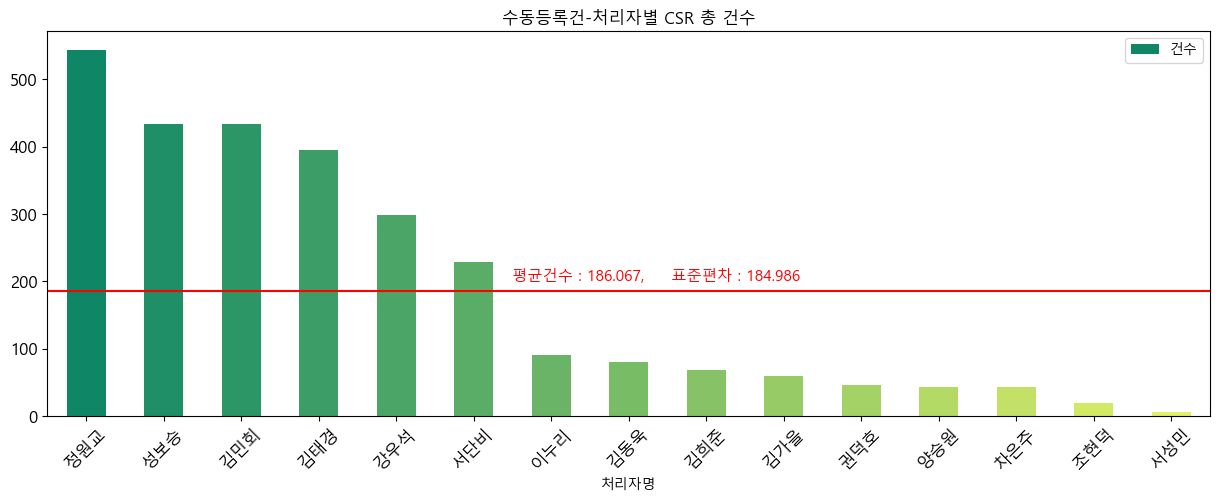

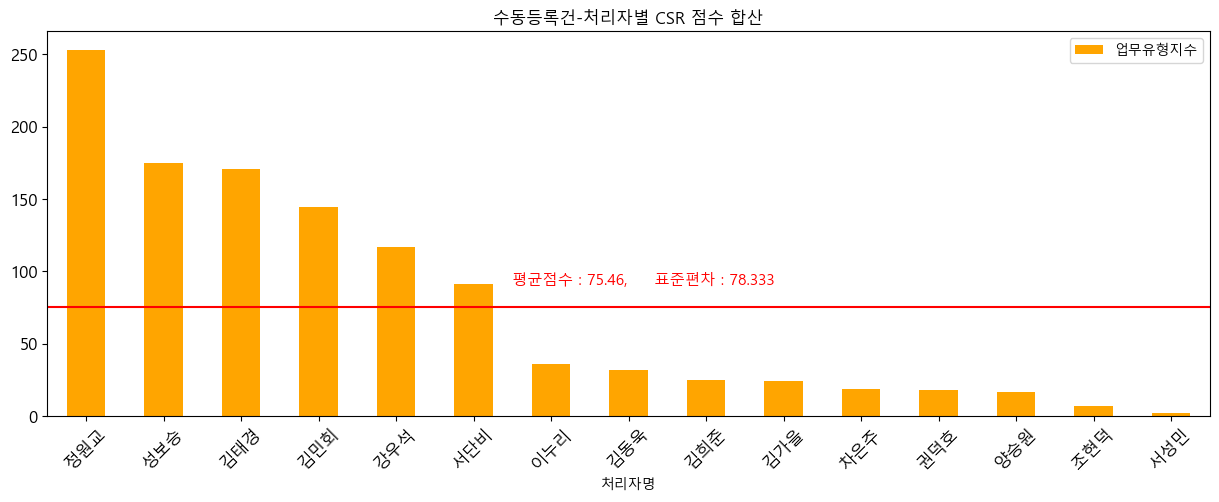

In [11]:

#수동등록건-처리자별 CSR 총 건수
csr_sub_group =df_A.groupby(['처리자명'], sort=True)[['건수']].sum().reset_index()
csr_sub_group =csr_sub_group.sort_values(by=['건수'],  ascending=False)
csr_sub_group.plot.bar(x='처리자명', y='건수', figsize=(15,5),fontsize=12,rot=45, title="수동등록건-처리자별 CSR 총 건수",color=colors)
plt.axhline(y=csr_sub_group['건수'].mean(),color='red')
plt.text(5.5,csr_sub_group['건수'].mean()+15,'평균건수 : {},     표준편차 : {}'.format(round(csr_sub_group['건수'].mean(),3),round(csr_sub_group['건수'].std(),3)),fontsize=11, color ='red')


#수동등록건-처리자별 CSR 점수 합산
csr_sub_groupA =df_A.groupby(['처리자명'], sort=True)[['업무유형지수']].sum().reset_index()
csr_sub_groupA =csr_sub_groupA.sort_values(by=['업무유형지수'],  ascending=False)
csr_sub_groupA.plot.bar(x='처리자명', y='업무유형지수', figsize=(15,5),fontsize=12,rot=45, title="수동등록건-처리자별 CSR 점수 합산", color='orange')
plt.axhline(y=csr_sub_groupA['업무유형지수'].mean(),color='red')
plt.text(5.5,csr_sub_groupA['업무유형지수'].mean()+15,'평균점수 : {},     표준편차 : {}'.format(round(csr_sub_groupA['업무유형지수'].mean(),3),round(csr_sub_groupA['업무유형지수'].std(),3)),fontsize=11, color ='red')


In [12]:
csr_sub_groupA.loc[15]=['강원호',0]
csr_sub_groupA=csr_sub_groupA.sort_values(by=['처리자명'])
csr_sub_groupBC=csr_sub_groupBC.sort_values(by=['처리자명'])

In [13]:
df_result = pd.merge(csr_sub_groupA,csr_sub_groupBC,how='inner',on='처리자명')
print(df_result)

   처리자명  업무유형지수_x  업무유형지수_y
0   강우석     116.8      36.8
1   강원호       0.0      36.8
2   권덕호      18.2      87.8
3   김가을      24.0      39.2
4   김동욱      32.1      39.2
5   김민회     144.5      95.5
6   김태경     170.6      42.3
7   김희준      24.8      87.8
8   서단비      91.6      70.9
9   서성민       2.0      95.5
10  성보승     175.0     118.5
11  양승원      16.8      70.9
12  이누리      36.4     118.5
13  정원교     253.2      29.1
14  조현덕       7.2      18.8
15  차은주      18.7      18.8


In [14]:
df_result['총점수'] =df_result['업무유형지수_x'] +df_result['업무유형지수_y']

Text(5.5, 148.64374999999998, '평균점수 : 133.644,     표준편차 : 85.873')

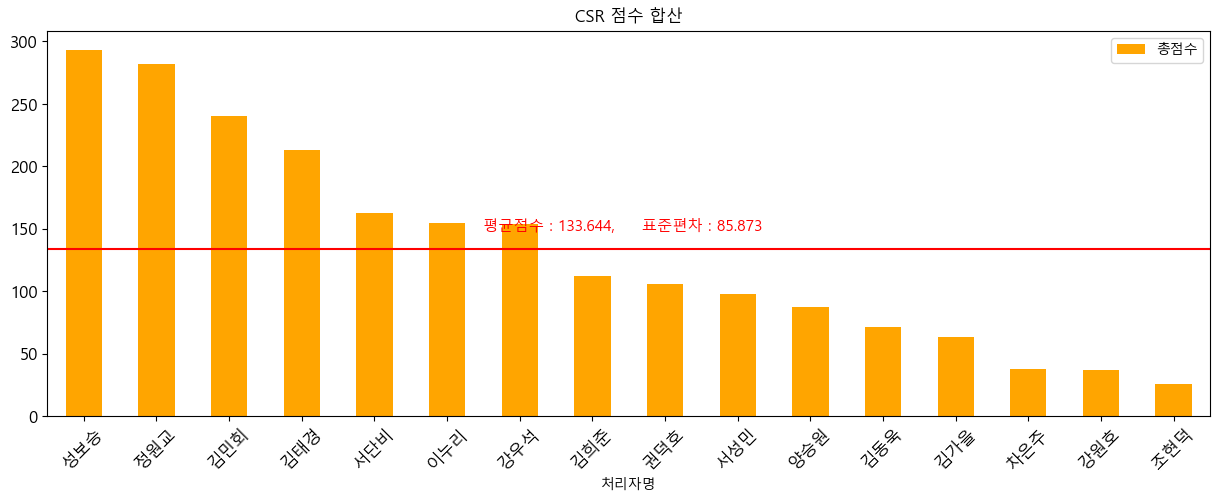

In [15]:
#CSR 점수 합산
df_result =df_result.sort_values(by=['총점수'],  ascending=False)
df_result.plot.bar(x='처리자명', y='총점수', figsize=(15,5),fontsize=12,rot=45, title="CSR 점수 합산", color='orange')
plt.axhline(y=df_result['총점수'].mean(),color='red')
plt.text(5.5,df_result['총점수'].mean()+15,'평균점수 : {},     표준편차 : {}'.format(round(df_result['총점수'].mean(),3),round(df_result['총점수'].std(),3)),fontsize=11, color ='red')


In [16]:
# 총 합산
df_ABC =df_real.loc[(df_real['처리자명']!='이주용')] #처리자가 이주용인경우 삭제

Text(5.5, 148.64375, '평균점수 : 133.644,     표준편차 : 110.334')

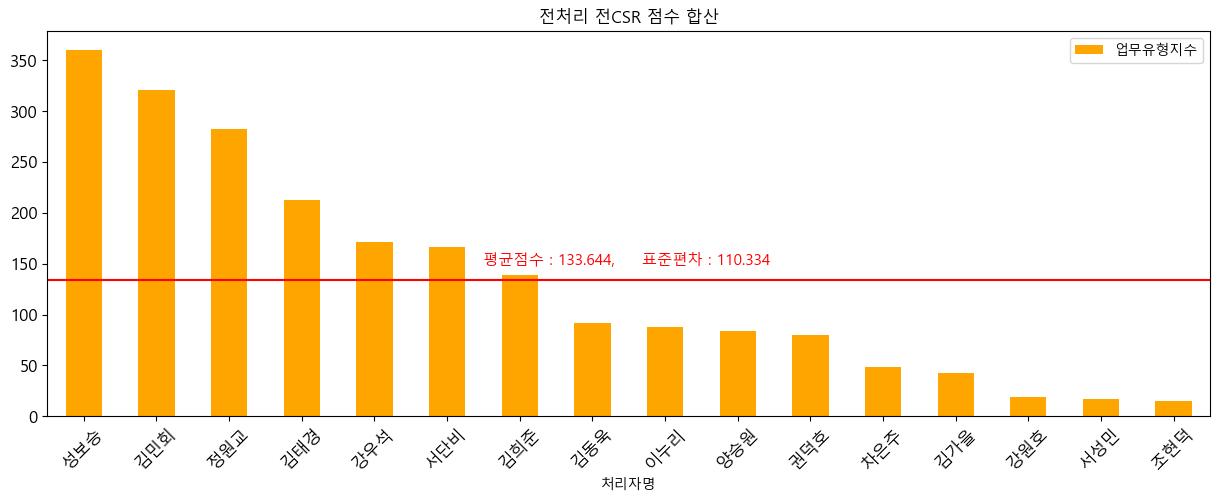

In [17]:
#전처리 전 총 합산
df_ABC =df_ABC.groupby(['처리자명'], sort=True)[['업무유형지수']].sum().reset_index()
df_ABC =df_ABC.sort_values(by=['업무유형지수'],  ascending=False)
df_ABC.plot.bar(x='처리자명', y='업무유형지수', figsize=(15,5),fontsize=12,rot=45, title="전처리 전CSR 점수 합산", color='orange')
plt.axhline(y=df_ABC['업무유형지수'].mean(),color='red')
plt.text(5.5,df_ABC['업무유형지수'].mean()+15,'평균점수 : {},     표준편차 : {}'.format(round(df_ABC['업무유형지수'].mean(),3),round(df_ABC['업무유형지수'].std(),3)),fontsize=11, color ='red')


In [18]:
mean = np.mean(csr_sub_groupA['업무유형지수'])
print(mean)

70.74375


In [19]:
csr_sub_groupA=csr_sub_groupA.sort_values(by=['업무유형지수'])
print(csr_sub_groupA)

   처리자명  업무유형지수
15  강원호     0.0
8   서성민     2.0
13  조현덕     7.2
10  양승원    16.8
1   권덕호    18.2
14  차은주    18.7
2   김가을    24.0
6   김희준    24.8
3   김동욱    32.1
11  이누리    36.4
7   서단비    91.6
0   강우석   116.8
4   김민회   144.5
5   김태경   170.6
9   성보승   175.0
12  정원교   253.2


In [34]:
df_result.columns=['처리자명','수동점수','자동점수','총점수']
df_result[['처리자명','총점수']]

,처리자명,총점수
10,성보승,293.5
13,정원교,282.3
5,김민회,240.0
6,김태경,212.9
8,서단비,162.5
12,이누리,154.9
0,강우석,153.6
7,김희준,112.6
2,권덕호,106.0
9,서성민,97.5


In [35]:
df_result['총점수'].describe()

count     16.000000
mean     133.643750
std       85.872564
min       26.000000
25%       69.275000
50%      109.300000
75%      175.100000
max      293.500000
Name: 총점수, dtype: float64

In [37]:
df_result_r =df_result.loc[((df_result['처리자명'].isin(['성보승','정원교','김민회','김태경','서단비','강우석','권덕호','서성민','김동욱','차은주','조현덕'])) )]
df_result_r

,처리자명,수동점수,자동점수,총점수
10,성보승,175.0,118.5,293.5
13,정원교,253.2,29.1,282.3
5,김민회,144.5,95.5,240.0
6,김태경,170.6,42.3,212.9
8,서단비,91.6,70.9,162.5
0,강우석,116.8,36.8,153.6
2,권덕호,18.2,87.8,106.0
9,서성민,2.0,95.5,97.5
4,김동욱,32.1,39.2,71.3
15,차은주,18.7,18.8,37.5


In [41]:
df_result_r['수동점수'].describe()

count     11.000000
mean      93.627273
std       84.907657
min        2.000000
25%       18.450000
50%       91.600000
75%      157.550000
max      253.200000
Name: 수동점수, dtype: float64

In [42]:
df_result1 =df_result_r.loc[(df_result['수동점수']>=93.627273)]
df_result1

,처리자명,수동점수,자동점수,총점수
10,성보승,175.0,118.5,293.5
13,정원교,253.2,29.1,282.3
5,김민회,144.5,95.5,240.0
6,김태경,170.6,42.3,212.9
0,강우석,116.8,36.8,153.6


In [44]:
df_result2 =df_result_r.loc[(df_result['수동점수']<=18.45)]
df_result2

,처리자명,수동점수,자동점수,총점수
2,권덕호,18.2,87.8,106.0
9,서성민,2.0,95.5,97.5
14,조현덕,7.2,18.8,26.0
